## Prophet Implementation

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/AAPL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,23-12-2019,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,24-12-2019,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,26-12-2019,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,27-12-2019,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


### Data Preprocessing

In [3]:
# Converting Date Column to DateTime Format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [4]:
dt = df.reset_index()[['Date', 'Close']]
dt.columns=['ds', 'y']

### Model Building

#### Fitting Model

In [5]:
from prophet import Prophet

# Initializing Prophet Model
model = Prophet()

# Fitting Model
fitted_model = model.fit(dt)

20:59:38 - cmdstanpy - INFO - Chain [1] start processing
20:59:38 - cmdstanpy - INFO - Chain [1] done processing


#### Making Predictions

In [6]:
# Creating Dataframe to hold the future dates for prediction
future = fitted_model.make_future_dataframe(periods=30)

# Making Predictions
forecast = fitted_model.predict(future)

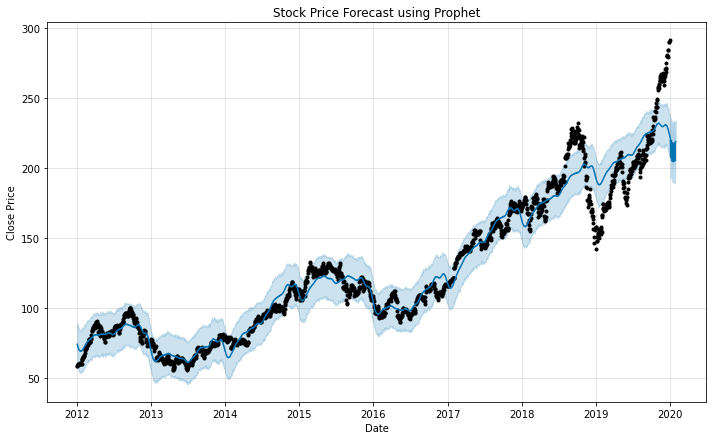

In [7]:
# Plotting the forecast
import matplotlib.pyplot as plt

fig = fitted_model.plot(forecast)
plt.title('Stock Price Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

#### Forecast components

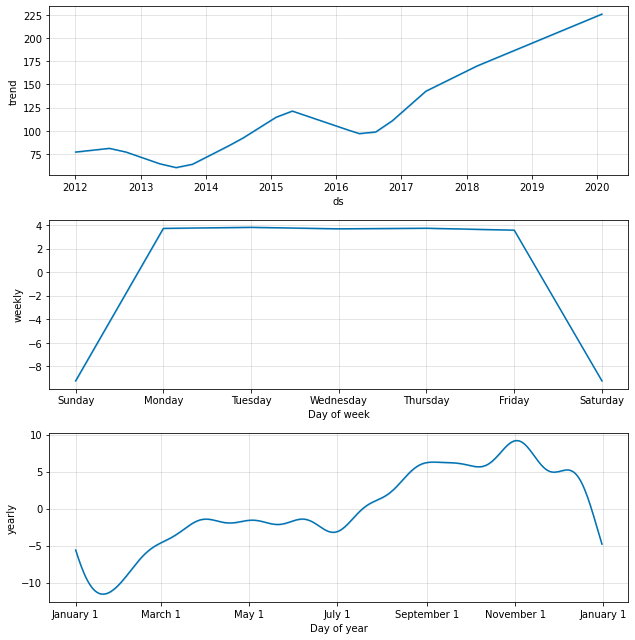

In [8]:
# Plotting Forecast components
fig2 = fitted_model.plot_components(forecast)
plt.show()

#### Forecasted Values

In [9]:
# Printing the forecasted values for the next 30 days
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
2011,2019-12-31,222.992896,207.294325,237.860755
2012,2020-01-01,222.302412,207.846357,237.072749
2013,2020-01-02,221.805195,206.322773,236.309124
2014,2020-01-03,221.115012,206.321719,236.018902
2015,2020-01-04,207.837868,192.882992,222.737833
2016,2020-01-05,207.365034,192.617925,221.832812
2017,2020-01-06,219.850068,205.699047,235.517163
2018,2020-01-07,219.530919,205.014077,234.124122
2019,2020-01-08,219.031241,203.112261,234.353895
2020,2020-01-09,218.744047,204.080557,234.181984


### Hyperparameter Tuning

In [10]:
# Defining hyperparameter grid
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'holidays_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

In [11]:
from prophet.diagnostics import cross_validation, performance_metrics

results = []

# Grid search
for cp_scale in param_grid['changepoint_prior_scale']:
    for s_scale in param_grid['seasonality_prior_scale']:
        for h_scale in param_grid['holidays_prior_scale']:
            for s_mode in param_grid['seasonality_mode']:
                # Initializing Prophet model with current parameters
                model = Prophet(
                    changepoint_prior_scale = cp_scale,
                    seasonality_prior_scale = s_scale,
                    holidays_prior_scale = h_scale,
                    seasonality_mode = s_mode
                )

                # Fitting the model
                model.fit(dt)

                # Performing cross-validation
                df_cv = cross_validation(
                    model= model,
                    initial= '1095 days',
                    period= '180 days',
                    horizon= '365 days',
                    parallel= 'processes'
                )

                # Computing performance metrics
                df_p = performance_metrics(df_cv)

                # Storing results
                results.append({
                    'changepoint_prior_scale': cp_scale,
                    'seasonality_prior_scale': s_scale,
                    'holidays_prior_scale': h_scale,
                    'seasonality_mode': s_mode,
                    'mse': df_p['mse'].mean()
                })

# Converting results to Dataframe
results_df = pd.DataFrame(results)

# Finding best parameters based on MSE
best_params = results_df.loc[results_df['mse'].idxmin()]

20:59:39 - cmdstanpy - INFO - Chain [1] start processing
20:59:40 - cmdstanpy - INFO - Chain [1] done processing
20:59:43 - cmdstanpy - INFO - Chain [1] start processing
20:59:43 - cmdstanpy - INFO - Chain [1] done processing
20:59:46 - cmdstanpy - INFO - Chain [1] start processing
20:59:46 - cmdstanpy - INFO - Chain [1] done processing
20:59:49 - cmdstanpy - INFO - Chain [1] start processing
20:59:50 - cmdstanpy - INFO - Chain [1] done processing
20:59:53 - cmdstanpy - INFO - Chain [1] start processing
20:59:53 - cmdstanpy - INFO - Chain [1] done processing
20:59:56 - cmdstanpy - INFO - Chain [1] start processing
20:59:56 - cmdstanpy - INFO - Chain [1] done processing
20:59:59 - cmdstanpy - INFO - Chain [1] start processing
20:59:59 - cmdstanpy - INFO - Chain [1] done processing
21:00:02 - cmdstanpy - INFO - Chain [1] start processing
21:00:03 - cmdstanpy - INFO - Chain [1] done processing
21:00:06 - cmdstanpy - INFO - Chain [1] start processing
21:00:06 - cmdstanpy - INFO - Chain [1]

In [12]:
print(f'Best Parameters: {best_params}')

Best Parameters: changepoint_prior_scale           0.5
seasonality_prior_scale           0.1
holidays_prior_scale             0.01
seasonality_mode             additive
mse                        752.886347
Name: 104, dtype: object


#### Building Model based on best parameters

In [15]:
# Training Model with best Parameters
best_model = Prophet(
    changepoint_prior_scale= best_params['changepoint_prior_scale'],
    seasonality_prior_scale= best_params['seasonality_prior_scale'],
    holidays_prior_scale= best_params['holidays_prior_scale'],
    seasonality_mode= best_params['seasonality_mode']
)

best_model.fit(dt)

21:08:44 - cmdstanpy - INFO - Chain [1] start processing
21:08:46 - cmdstanpy - INFO - Chain [1] done processing


#### Making Predictions

In [16]:
# Creating a dataframe to hold the future dates for prediction
future = best_model.make_future_dataframe(periods=30)

# Making Predictions
forecast = best_model.predict(future)

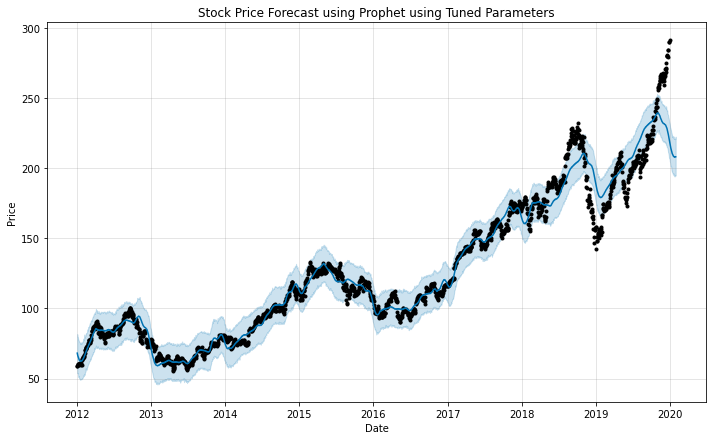

In [17]:
# Plotting forecast
fig = best_model.plot(forecast)
plt.title('Stock Price Forecast using Prophet using Tuned Parameters')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

#### Forecast Components

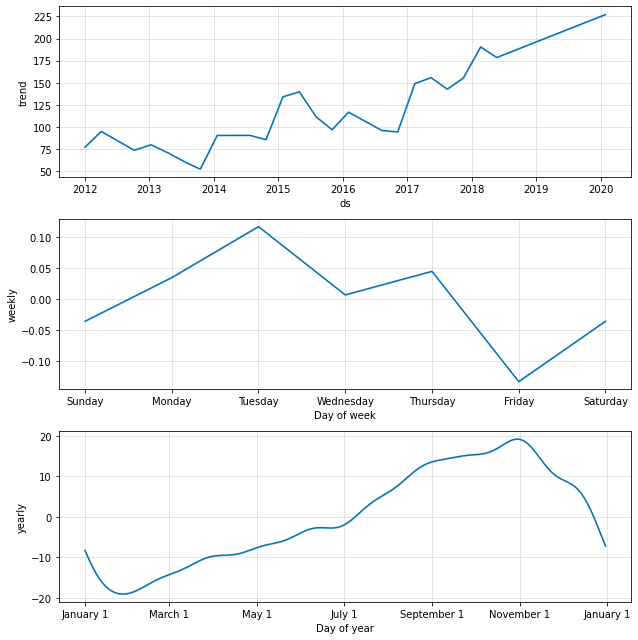

In [18]:
# Plotting the forecast components
fig2 = best_model.plot_components(forecast)
plt.show()

#### Forecast Values

In [19]:
# Printing Forecasted values for the next 30 days
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30))

             ds        yhat  yhat_lower  yhat_upper
2011 2019-12-31  218.180864  204.840320  231.366667
2012 2020-01-01  217.280405  204.264405  229.962077
2013 2020-01-02  216.545661  203.715344  229.089829
2014 2020-01-03  215.615473  202.187742  228.430572
2015 2020-01-04  214.986388  201.455015  228.295955
2016 2020-01-05  214.287948  201.650814  227.051583
2017 2020-01-06  213.691333  200.725882  226.998639
2018 2020-01-07  213.140131  201.289275  225.942700
2019 2020-01-08  212.431431  198.574132  225.211650
2020 2020-01-09  211.908378  198.516727  224.901414
2021 2020-01-10  211.206736  197.421339  223.608094
2022 2020-01-11  210.819957  198.007460  223.749362
2023 2020-01-12  210.374544  196.830802  222.271247
2024 2020-01-13  210.038748  196.674314  222.875536
2025 2020-01-14  209.753392  196.643720  222.046196
2026 2020-01-15  209.313008  195.500475  221.834602
2027 2020-01-16  209.058430  195.585622  222.533996
2028 2020-01-17  208.623375  196.532182  222.719667
2029 2020-01